# Factor Analysis X PCA

A análise fatorial(Factor Analysis) é um método estatístico usado para descrever a variabilidade entre variáveis observadas e correlacionadas em termos de um número potencialmente menor de variáveis não observadas, denominadas fatores. Por exemplo, é possível que variações em seis variáveis observadas reflitam principalmente as variações em duas variáveis não observadas (subjacentes). A análise fatorial busca por tais variações articulares em resposta a variáveis latentes não observadas. As variáveis observadas são modeladas como combinações lineares dos fatores potenciais, mais termos de "erro". A análise fatorial visa encontrar variáveis latentes independentes.

É uma teoria usada em aprendizado de máquina e relacionada à mineração de dados. A teoria por trás dos métodos analíticos de fator é que as informações obtidas sobre as interdependências entre as variáveis observadas podem ser usadas posteriormente para reduzir o conjunto de variáveis em um conjunto de dados. A análise fatorial é comumente usada em biologia, psicometria, teorias da personalidade, marketing, gerenciamento de produtos, pesquisa operacional e finanças. Pode ajudar a lidar com conjuntos de dados em que há um grande número de variáveis observadas que, segundo se acredita, refletem um número menor de variáveis subjacentes / latentes. É uma das técnicas de interdependência mais comumente usadas e é usada quando o conjunto relevante de variáveis mostra uma interdependência sistemática e o objetivo é descobrir os fatores latentes que criam uma semelhança.

A análise fatorial está relacionada à análise de componentes principais (PCA), mas os dois não são idênticos.Houve controvérsia significativa no campo sobre as diferenças entre as duas técnicas.O PCA pode ser considerado como uma versão mais básica da análise fatorial exploratória (EFA) que foi desenvolvida nos primeiros dias anteriores ao advento dos computadores de alta velocidade. Tanto o PCA como a análise fatorial visam reduzir a dimensionalidade de um conjunto de dados, mas as abordagens adotadas para isso são diferentes para as duas técnicas. A análise fatorial é claramente projetada com o objetivo de identificar certos fatores não observáveis a partir das variáveis observadas, enquanto a PCA não aborda diretamente esse objetivo; na melhor das hipóteses, o PCA fornece uma aproximação aos fatores necessários. Do ponto de vista da análise exploratória, os autovalores da PCA são cargas de componentes infladas, ou seja, contaminadas com variância de erros

Análise Fatorial (FA)é um modelo generativo linear simples com variáveis latentes de Gaussianas. Nele supõe-se que as observações sejam causadas por uma transformação linear de fatores latentes de menor dimensão e um ruído gaussiano adicional. Sem perda de generalidade, os fatores são distribuídos de acordo com um Gaussiano com média zero e covariância unitária. O ruído também é zero e tem uma matriz de covariância diagonal arbitrária.

Se restringirmos ainda mais o modelo, assumindo que o ruído gaussiano é mesmo isotrópico (todas as entradas na diagonal são as mesmas) obteríamos PPCA(PCA probabilístico).

O FactorAnalysis realiza uma estimativa de máxima verossimilhança da chamada matriz de carga, a transformação das variáveis latentes para as observadas, usando a maximização da expectativa (EM). 

# Comparação PCA e Factor Analysis

best n_components by PCA CV = 10
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 10
best n_components by PCA CV = 35
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 38


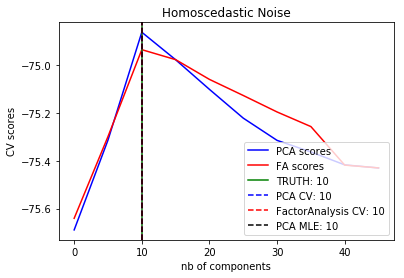

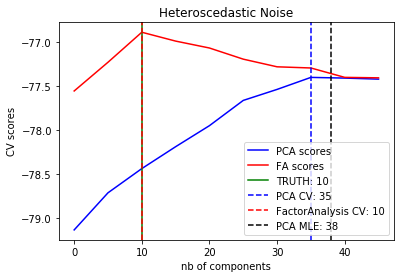

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# #############################################################################
#Data

n_samples, n_features, rank = 1000, 50, 10
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

# #############################################################################
# Fit the models

n_components = np.arange(0, n_features, 5)  # options for n_components


def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X, cv=5)))
        fa_scores.append(np.mean(cross_val_score(fa, X, cv=5)))

    return pca_scores, fa_scores


for X, title in [(X_homo, 'Homoscedastic Noise'),
                 (X_hetero, 'Heteroscedastic Noise')]:
    pca_scores, fa_scores = compute_scores(X)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]

    pca = PCA(svd_solver='full', n_components='mle')
    pca.fit(X)
    n_components_pca_mle = pca.n_components_

    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure()
    plt.plot(n_components, pca_scores, 'b', label='PCA scores')
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
    plt.axvline(n_components_pca, color='b',
                label='PCA CV: %d' % n_components_pca, linestyle='--')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
    plt.axvline(n_components_pca_mle, color='k',
                label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')
    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

Na implementação o PCA e o Factor Analysis são comparados em performace com features que sofrem 2 tipos de ruídos , vemos que no caso do ruído homoscedastico , ambos se saem muito bem e conseguem recuperar o tamanho do subepaço . Já no caso do segundo ruído a probabilidade do PCA é maior do que o FA . No entanto o PCA falha e superestima a classificação quando o ruído heteroscedástico está presente .

In [3]:
from sklearn.datasets import load_digits
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X.shape

(1797, 64)

In [4]:
#Factor Analysis
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 7)

In [5]:
#PCA
pca = PCA(n_components=7)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
X_pca = pca.fit_transform(X)

In [7]:
X_pca.shape

(1797, 7)

In [8]:
pca.score(X,X_pca)

-164.84489804343073

In [9]:
transformer.score(X,X_transformed)

-87.0171476758305

Nesse trecho de código usamos o dataset digitis presente no Sklearn e utilizamos o PCA e o FA , temos que o score , obtido pelo próprio sklearn , é maior para o FA. Abaixo calculo a perda para o PCA , porém calcular essa perda para o FA não é tão trivial , pois terimos que separar os fatores que foram obtidos ao final da sua execução

In [10]:
X_projected = pca.inverse_transform(X_pca)

In [11]:
loss = ((X - X_projected) ** 2).mean()

In [12]:
loss

6.809148274315991

# Vantagens e Desvantagens

Quando usar o Factor Analysis?(Vantagens) : Quando você não tem conhecimento do dataset , pois o modelo busca usar a correlação dos dados para combiná-los em fatores , também quando será feita uma análise de exploração pois ele consegue categorizar os dados na sua redução da dimensionalidade.
Quando não e bom usar o Factor Analysis : O Factor Analysis pode remover informações ignorando as mais relevantes , outro problema é que pode ser escolhido um modelo que representa muito bem os ruídos e não tão bem os demais dados .Outro fato é que os fatores não são muito bons para serem interpretados

Portanto é melhor usar o PCA quando já se tem conhecimento prévio do Dataset e também quando se quer produzir uma boa interpretação dos dados originais .


# Fontes

 1 - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html acessado em 26/06/2019
 2 - https://en.wikipedia.org/wiki/Factor_analysis#Example acessado em 26/06/2019